In [6]:
import requests 
import os
from datetime import datetime
import pandas
import numpy as np


# DOWNLOAD DATA FROM API

In [36]:
data= ''
n=0

while True :

    ploads = {'api-key':'579b464db66ec23bdd000001cdd3946e44ce4aad7209ff7b23ac571b','format':'csv',
    'offset':n,
    'limit':10,
    # 'filters':'city=Calcutta',
    }
    r=requests.get('https://api.data.gov.in/resource/3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69',params=ploads)
    n+=10
    data+=r.text
    if r.text == '':
        break

# WRITE DATA TO CSV

In [37]:

time = datetime.now()
text_file = open("csv/Air-{}.csv".format(time), "w")
n = text_file.write(data)
text_file.close()

## LOAD DATA

In [210]:
import glob
data = glob.glob('csv/*')
data[0]

'csv/Air-2020-12-03 12:36:41.921132.csv'

In [211]:
df=pandas.read_csv(data[0])
df=df.drop_duplicates()
df=df.drop(df.index[[10]])


## clean data

In [212]:

df=df.drop('pollutant_unit',axis=1)
df.dtypes

id               object
country          object
state            object
city             object
station          object
last_update      object
pollutant_id     object
pollutant_min    object
pollutant_max    object
pollutant_avg    object
dtype: object

In [213]:
df= df.fillna(0.0001)

df['pollutant_min']=df['pollutant_min'].astype('float')
df['pollutant_max']=df['pollutant_max'].astype('float')
df['pollutant_avg']=df['pollutant_avg'].astype('float')

#replace nans and change datatype

# CLEANED CSV

In [214]:
df['city'].unique()

array(['Amaravati', 'Rajamahendravaram', 'Tirupati', 'Visakhapatnam',
       'Guwahati', 'Gaya', 'Hajipur', 'Muzaffarpur', 'Patna',
       'Chandigarh', 'Delhi', 'Ahmedabad', 'Ankleshwar', 'Gandhinagar',
       'Nandesari', 'Vapi', 'Vatva', 'Ambala', 'Bahadurgarh',
       'Ballabgarh', 'Bhiwani', 'Charkhi Dadri', 'Dharuhera', 'Faridabad',
       'Fatehabad', 'Gurugram', 'Hisar', 'Jind', 'Kaithal', 'Karnal',
       'Kurukshetra', 'Mandikhera', 'Manesar', 'Narnaul', 'Palwal',
       'Panchkula', 'Panipat', 'Rohtak', 'Sirsa', 'Sonipat',
       'Yamunanagar', 'Jorapokhar', 'Bengaluru', 'Chikkaballapur',
       'Chikkamagaluru', 'Hubballi', 'Kalaburgi', 'Medikeri',
       'Ramanagara', 'Shivamogga', 'Vijayapura', 'Yadgir', 'Eloor',
       'Ernakulam', 'Kannur', 'Kochi', 'Kollam', 'Kozhikode',
       'Thiruvananthapuram', 'Thrissur', 'Bhopal', 'Damoh', 'Dewas',
       'Gwalior', 'Indore', 'Jabalpur', 'Katni', 'Maihar', 'Mandideep',
       'Pithampur', 'Ratlam', 'Sagar', 'Satna', 'Singrauli',

In [151]:
df

,id,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-12-2020 11:00:00,PM2.5,49.0000,339.0000,104.0000
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-12-2020 11:00:00,PM10,59.0000,185.0000,95.0000
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-12-2020 11:00:00,NO2,18.0000,62.0000,27.0000
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-12-2020 11:00:00,NH3,3.0000,6.0000,4.0000
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-12-2020 11:00:00,SO2,5.0000,31.0000,20.0000
...,...,...,...,...,...,...,...,...,...,...
1701,1548,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",03-12-2020 11:00:00,NO2,26.0000,117.0000,80.0000
1702,1549,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",03-12-2020 11:00:00,NH3,0.0001,0.0001,0.0001
1703,1550,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",03-12-2020 11:00:00,SO2,10.0000,49.0000,22.0000
1705,1551,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",03-12-2020 11:00:00,CO,26.0000,123.0000,63.0000


# Data Visulization

In [152]:
import plotly.express as px
def generateScatter(filterr,choice):
    fig = px.scatter(df[df[filterr]==choice], x="pollutant_avg", y="station", color="pollutant_id",size='pollutant_max')
    fig.update_layout(
        title="Pollutants in - {} ".format(choice),
        legend_title="Pollutants",
        font=dict(
            family="Courier New, monospace",
            size=12,
    )
    )
    filename="outs/(SCATTER)Pollutants in - {} ".format(choice)
    fig.write_html("{}.html".format(filename))
    fig.show()
    
generateScatter('state','Delhi')
generateScatter('city','Chennai'),

(None,)

In [6]:
import plotly.graph_objects as go

def generatePiechart(filterr,choice):
    labels = df['pollutant_id'].unique()

    values = []

    datachunk=df[df[filterr]==choice]
    for i in labels:
        cc=datachunk[datachunk['pollutant_id']==i]
        values.append(cc['pollutant_avg'].mean())

    # Use `hole` to create a donut-like pie chart
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,)])
    fig.update_layout(
    title="Pollutants in - {} ".format(choice),
    legend_title="Pollutants",
    font=dict(
        family="Courier New, monospace",
        size=12,
        )
        )
    filename="outs/(PIE)Pollutants in - {} ".format(choice)
    fig.write_html("{}.html".format(filename))
    fig.show()

generatePiechart('state','Uttar_Pradesh'),generatePiechart('city','Delhi'),generatePiechart('city','Chennai')

NameError: name 'df' is not defined

# TIME SERIES BASED ON PAST FILES

In [8]:
import pandas as pd
import glob
import plotly.express as px
files = glob.glob('csv/*')
files[:]

['csv/Air-2020-12-03 12:36:41.921132.csv',
 'csv/Air-2020-12-04 14:53:00.741898.csv',
 'csv/Air-2020-12-06 15:15:47.144212.csv',
 'csv/Air-2020-12-06 18:29:54.446376.csv',
 'csv/Air-2020-12-03 23:08:25.842859.csv',
 'csv/Air-2020-12-04 00:55:51.311944.csv',
 'csv/Air-2020-12-07 07:46:17.245344.csv',
 'csv/Air-2020-12-08 12:58:30.166787.csv']

In [9]:

def pollutantRegionalOverTime(filterr,choice):
    n=0
    dxff = pandas.DataFrame(columns = ["date", "pollutant","avg_amt"])
    for f in files:
        dxf=pandas.read_csv(f)
        dxf=dxf.drop_duplicates()
        dxf=dxf.drop(dxf.index[[10]])
        dxf=dxf.drop('pollutant_unit',axis=1)
        dxf= dxf.fillna(0.0001)

        dxf['pollutant_min']=dxf['pollutant_min'].astype('float')
        dxf['pollutant_max']=dxf['pollutant_max'].astype('float')
        dxf['pollutant_avg']=dxf['pollutant_avg'].astype('float')
        dxf=dxf[dxf[filterr]==choice]

        labels = dxf['pollutant_id'].unique()
        date=dxf['last_update'].mode()[0]
        for i in labels:
            cc=dxf[dxf['pollutant_id']==i]
            mean_val = cc['pollutant_avg'].mean()

            dxff.loc[n] = [date,i,mean_val]
            n+=1
    dxff['date'] =pd.to_datetime(dxff.date,format='%d-%m-%Y %H:%M:%S')
    dxff=dxff.sort_values(by='date') 
    fig = px.line(dxff, x='date', y='avg_amt',
            color="pollutant",
            line_group="pollutant")
    fig.update_layout(
    title="Pollutants in - {} ".format(choice),
    legend_title="Pollutants",
    font=dict(
        family="Courier New, monospace",
        size=12,
        )
        )
    filename="outs/(TIME)Pollutants in - {} ".format(choice)
    # fig.write_html("{}.html".format(filename))
    fig.show()
    return(dxff)


    
    

a=pollutantRegionalOverTime('city','Delhi')


# FORECASTING

In [10]:
a=a[a['pollutant']=='OZONE']

In [11]:
a

,date,pollutant,avg_amt
34,2020-12-03 10:00:00,OZONE,50.263158
6,2020-12-03 11:00:00,OZONE,14.513514
13,2020-12-04 02:00:00,OZONE,87.684211
41,2020-12-04 12:00:00,OZONE,32.973684
20,2020-12-06 02:00:00,OZONE,76.447368
27,2020-12-06 05:00:00,OZONE,71.552632
48,2020-12-07 07:00:00,OZONE,9.289482
55,2020-12-08 12:00:00,OZONE,29.527786


import numpy as np

In [39]:
series = np.array(a['avg_amt'])
type(series)

numpy.ndarray

## VISUALIZE OUR ORIGINAL DATASET

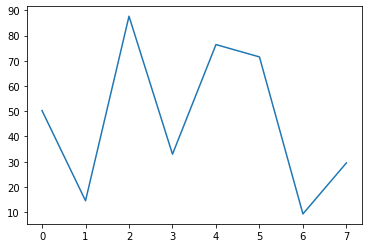

In [40]:
import matplotlib.pyplot as plt
plt.plot(series)
plt.show()

In [21]:

# series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

"""
use above to visualize data manipulation with a sinwave instead 
"""

'\nuse above to visualize data manipulation with a sinwave instead \n'

In [41]:
# use T past values to predict the next value
T = 4
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)


X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (4, 4) Y.shape (4,)


In [24]:
# X,Y

## VISUALIZE LABLES AND FEATURES

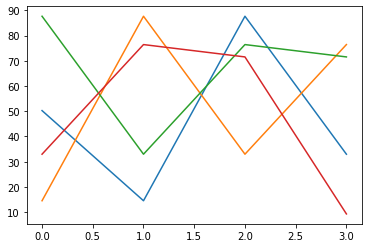

In [48]:
plt.plot(X)
plt.show()

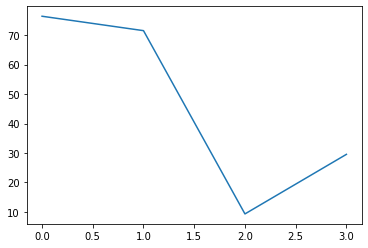

In [49]:
plt.plot(Y)
plt.show()

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [44]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],#splitting the data 
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 2 samples, validate on 2 samples
Epoch 1/80
2/2 [==============================] - 0s 153ms/sample - loss: 6339.8735 - val_loss: 570.0176
Epoch 2/80
2/2 [==============================] - 0s 5ms/sample - loss: 3681.5403 - val_loss: 1863.0435
Epoch 3/80
2/2 [==============================] - 0s 6ms/sample - loss: 1849.8428 - val_loss: 4053.0532
Epoch 4/80
2/2 [==============================] - 0s 4ms/sample - loss: 811.9744 - val_loss: 6805.6426
Epoch 5/80
2/2 [==============================] - 0s 5ms/sample - loss: 456.2995 - val_loss: 9594.0156
Epoch 6/80
2/2 [==============================] - 0s 8ms/sample - loss: 568.2147 - val_loss: 11856.6582
Epoch 7/80
2/2 [==============================] - 0s 6ms/sample - loss: 872.7850 - val_loss: 13238.9912
Epoch 8/80
2/2 [==============================] - 0s 4ms/sample - loss: 1138.8127 - val_loss: 13668.9111
Epoch 9/80
2/2 [==============================] - 0s 12ms/sample - loss: 1244.6580 - val_loss: 13268.0996
Epoch 10/80
2/2 [===

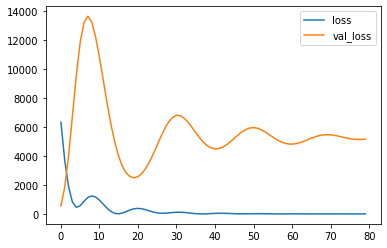

In [45]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [47]:
-N//2

-2

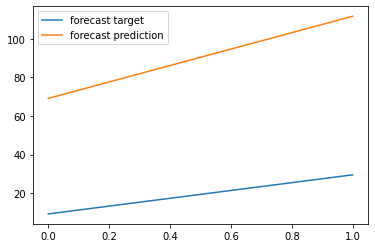

In [46]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [37]:
X[-98]

array([-0.25384011, -0.55305334, -0.53237459, -0.82378367])